# Market segmentation example

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv('example.csv')

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Plot the data

Text(0, 0.5, 'Loyalty')

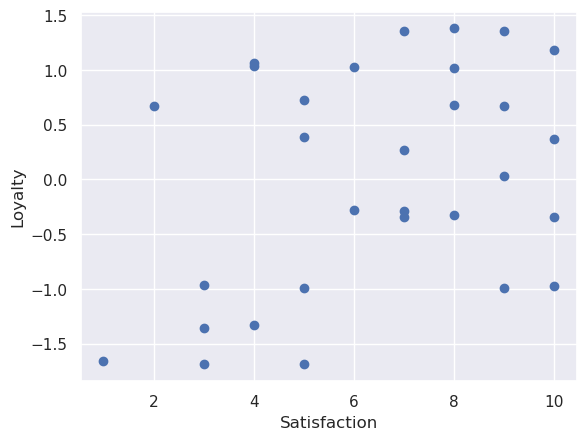

In [5]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Select the features

In [6]:
x = data.copy()

## Clustering

In [7]:
kmeans = KMeans(2)
kmeans.fit(x)

/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

## Clustering results

In [8]:
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Loyalty')

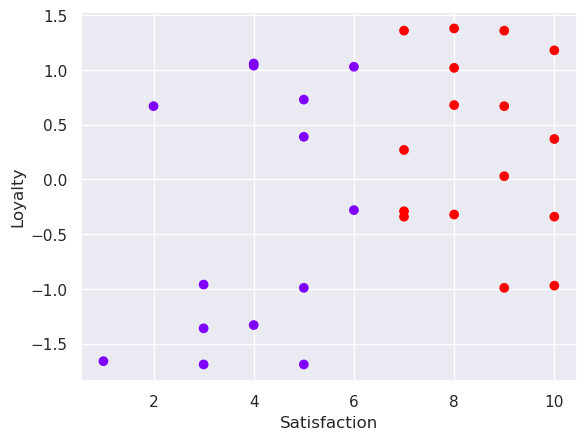

In [9]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Standardize the variables

In [10]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [11]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091782,
 5.363006425346784,
 4.337110750237059,
 3.8342434382627637]

Text(0, 0.5, 'WCSS')

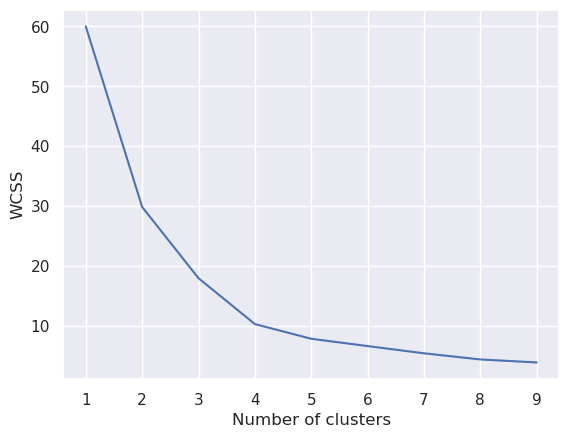

In [12]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

## Explore clustering solutions and select the number of clusters

In [13]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/iabubakkar11/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,6
1,6,-0.28,4
2,5,-0.99,6
3,7,-0.29,4
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,7
7,8,-0.32,4
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

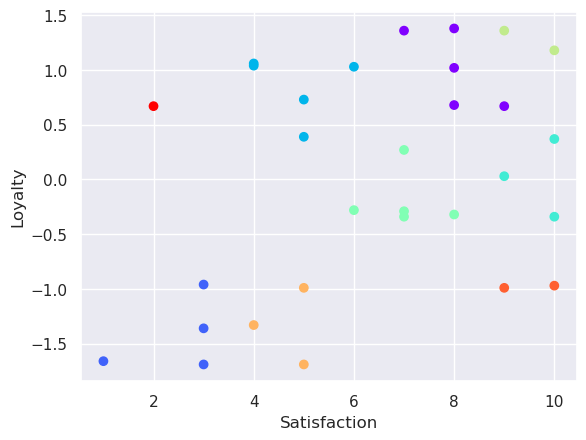

In [15]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')